# Yolo on Fisheye
We have two methods to solve this fisheye detection problem: 

Method I:
1. Dewarp fisheye images
2. Run a yolo detector on it.
3. Map predicted boxes back to fisheye coordinates

Method II: 
1. Augment fisheye images a little bit for improving detections
2. Train yolo detector directly on fisheye frames
3. Map predicted boxes back to fisheye coordinates

## Imports

In [30]:
import torch
from torchvision.datasets import coco
import os
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

In [31]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [32]:
DATA_PATH = '/media/abhitemb/DATA/Users/abhitemb/Documents/FishEye/TrainVal/Fisheye8K_all_including_train&test'
TRAIN_PATH = os.path.join(DATA_PATH, 'train', 'images')
TRAIN_ANNOT = os.path.join(DATA_PATH, 'train', 'train.json')
TEST_PATH = os.path.join(DATA_PATH, 'test', 'images')
TEST_ANNOT = os.path.join(DATA_PATH, 'test', 'test.json')

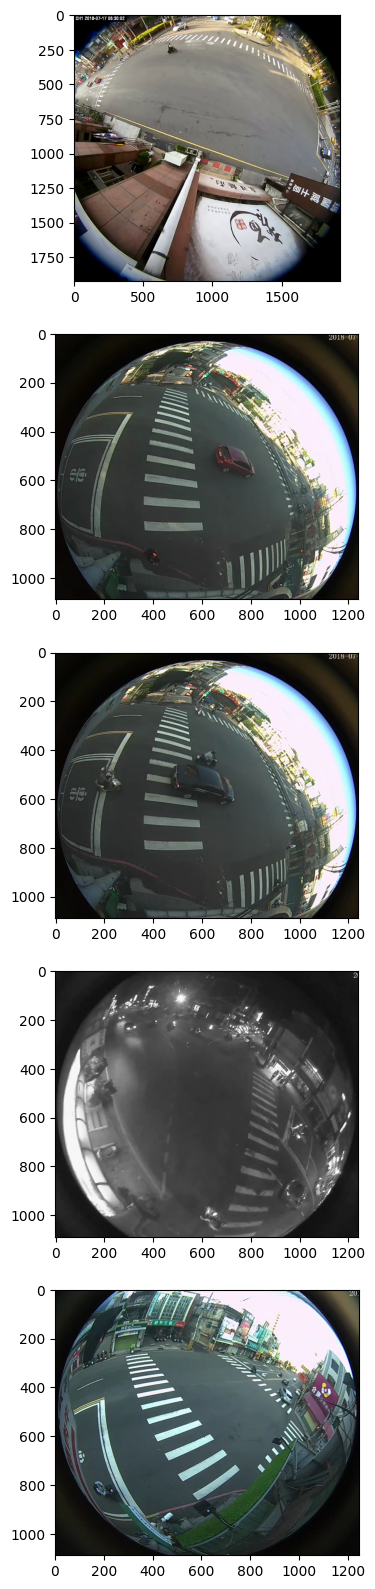

In [33]:
%matplotlib inline

imgs = os.listdir(TRAIN_PATH)
rand_imgs = np.random.choice(imgs, 5)

fig, ax = plt.subplots(5, 1, figsize=(10, 20))

for i, axes in enumerate(ax): 
    img = np.array(Image.open(os.path.join(TRAIN_PATH, rand_imgs[i])))
    axes.imshow(img)
    
plt.show()

In [34]:
train_dataset = coco.CocoDetection(TRAIN_PATH, annFile=TRAIN_ANNOT)
test_dataset = coco.CocoDetection(TEST_PATH, annFile=TEST_ANNOT)

loading annotations into memory...
Done (t=0.46s)
creating index...
index created!
loading annotations into memory...
Done (t=0.20s)
creating index...
index created!


In [35]:
# def draw_bounding_box(img, bounding_box, text, color):
#     x1, y1, w, h = bounding_box
#     draw = ImageDraw.Draw(img)
#     draw.rectangle(bounding_box, outline='red', width=3)
#     font = ImageFont.load_default()
    
#     text_size = draw.textsize(text, font=font)
#     text_origin = (x1, y1 - text_size[1] - 2)

#     draw.rectangle([text_origin, (text_origin[0] + text_size[0], text_origin[1] + text_size[1])], fill='red')
#     draw.text(text_origin, text, fill='white', font=font)

In [54]:
%matplotlib inline

def draw_bounding_box(img, bounding_box, label, color):
    draw = ImageDraw.Draw(img)
    font = ImageFont.load_default()
    label = str(label)
    
    x1, y1, w, h = bounding_box

    # draw rectangle
    draw.rectangle([x1, y1, x1 + w, y1 + h], outline=color, width=3)

    # label background
    # text_w, text_h = draw.textbbox(label, font=font, text=label)
    # # place above box, but not off image
    # ty = max(y1 - text_h - 2, 0)
    # draw.rectangle([x1, ty, x1 + text_w, ty + text_h], fill=color)

    # label text
    draw.text((x1, y1), label, fill='white', font=font)
    return img

[145, 343, 74, 108]
[684, 295, 55, 51]
[561, 676, 128, 150]
[803, 416, 66, 64]
[996, 682, 61, 56]
[1057, 743, 43, 39]
[380, 173, 62, 37]
[410, 139, 56, 30]
[934, 450, 70, 82]
[879, 379, 22, 34]
[882, 396, 30, 42]
[896, 411, 31, 41]
[340, 788, 79, 91]
[235, 795, 119, 137]
[343, 190, 28, 34]
[384, 198, 27, 40]
[365, 207, 30, 39]
[483, 199, 77, 44]
[472, 163, 62, 27]
[319, 167, 48, 42]
[322, 146, 23, 16]
[296, 172, 25, 25]
[744, 233, 42, 23]
[830, 248, 15, 16]
[820, 248, 13, 21]
[801, 245, 18, 20]
[785, 244, 19, 23]
[772, 245, 21, 24]
[760, 246, 23, 22]
[747, 244, 18, 26]
[824, 275, 18, 21]
[1090, 724, 42, 84]
[839, 342, 27, 38]
[1038, 590, 27, 39]
[1019, 566, 34, 44]
[1049, 613, 27, 37]
[784, 229, 17, 14]
[694, 214, 25, 25]
[729, 221, 20, 24]
[715, 218, 20, 26]
[275, 163, 20, 26]
[268, 159, 26, 20]
[256, 159, 18, 15]
[803, 236, 26, 27]
[370, 184, 21, 31]


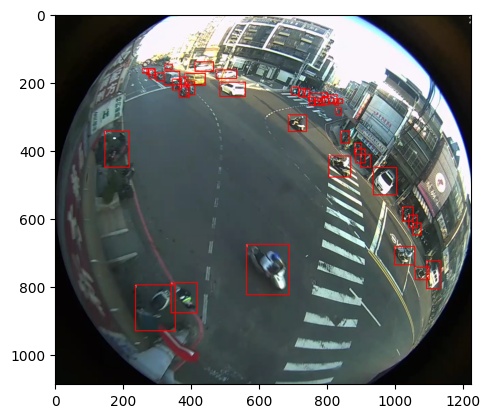

In [55]:
for img, lbls in train_dataset:
    new_img = None

    for lbl in lbls: 
        bounding_box = lbl['bbox']
        text = lbl['category_id']
        print(bounding_box)

        new_img = draw_bounding_box(img, bounding_box, text, 'red')
        
    plt.imshow(new_img)
    plt.show()

    break